Importing the Lbiraries

In [330]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import pandas as pd
import seaborn as sns


Data collection & Preprocessing

In [331]:
#loading the csv data to a Pandas dataframe
datatxt=pd.read_csv('/content/gender_classification_v7.csv')


In [332]:
#pring dataset 
datatxt

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [333]:
#number of rows and coloumns
datatxt.shape

(5001, 8)

In [334]:
#getting some basic information about the data
datatxt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [335]:
#convert object Dtype to int64 Dtye
datatxt.replace({"gender":{'Male':0, 'Female':1}}, inplace=True)

In [336]:
datatxt

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,1
4997,1,11.9,5.4,0,0,0,0,1
4998,1,12.9,5.7,0,0,0,0,1
4999,1,13.2,6.2,0,0,0,0,1


In [337]:
datatxt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB


In [338]:
#checking the number of missing values
datatxt.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

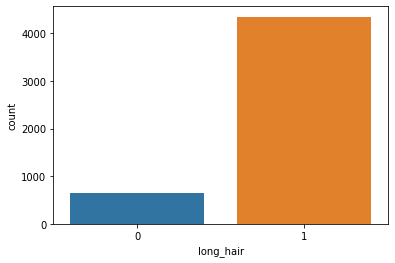

In [339]:
#checking the count of long hair
sns.countplot(data=datatxt,x='long_hair')

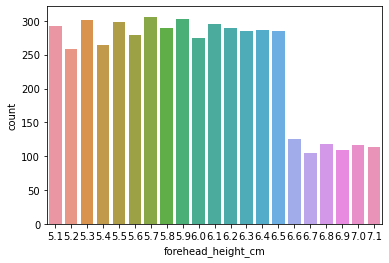

In [340]:
#checking the count of forehead hight
sns.countplot(data=datatxt,x='forehead_height_cm')


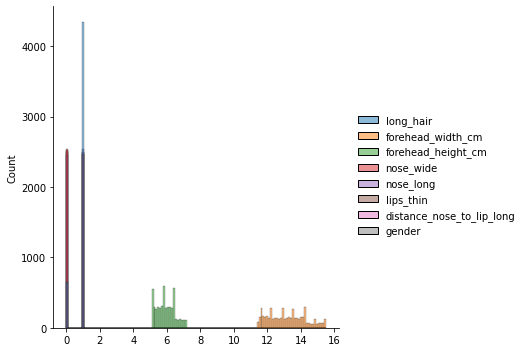

In [341]:
#Check the count of fields
sns.displot(data=datatxt)

In [342]:
# split into input (X) and output (Y) variables
x=datatxt.iloc[:,:].values[:,0:4]
y=datatxt.iloc[:,:].values[:,4]



Spilliting into Training data & Testing data

In [343]:
from sklearn.model_selection import train_test_split
# split into 67% for train and 33% for test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [344]:
# create model
model=Sequential()
#adds a dense layer withsigmoid activation function
model.add(Dense(128,input_shape=(4,),activation='relu'))
#add a droupout layer to handle overfitting
model.add(Dropout(0.2))
#adds a dense layer with relu activation function
model.add(Dense(64,activation='sigmoid'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [345]:
# Compile model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_187 (Dense)           (None, 128)               640       
                                                                 
 dropout_47 (Dropout)        (None, 128)               0         
                                                                 
 dense_188 (Dense)           (None, 64)                8256      
                                                                 
 dense_189 (Dense)           (None, 8)                 520       
                                                                 
 dense_190 (Dense)           (None, 1)                 9         
                                                                 
Total params: 9,425
Trainable params: 9,425
Non-trainable params: 0
_________________________________________________________________


In [346]:
# Fit the model with data list epoch & batch sizes
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=100, batch_size=10)

Epoch 1/100
335/335 [==============================] - 2s 4ms/step - loss: 0.6327 - accuracy: 0.6478 - val_loss: 0.5262 - val_accuracy: 0.7844
Epoch 2/100
335/335 [==============================] - 1s 3ms/step - loss: 0.5387 - accuracy: 0.7782 - val_loss: 0.5210 - val_accuracy: 0.7844
Epoch 3/100
335/335 [==============================] - 1s 3ms/step - loss: 0.5334 - accuracy: 0.7770 - val_loss: 0.5225 - val_accuracy: 0.7844
Epoch 4/100
335/335 [==============================] - 1s 3ms/step - loss: 0.5317 - accuracy: 0.7815 - val_loss: 0.5191 - val_accuracy: 0.7844
Epoch 5/100
335/335 [==============================] - 1s 3ms/step - loss: 0.5298 - accuracy: 0.7812 - val_loss: 0.5187 - val_accuracy: 0.7844
Epoch 6/100
335/335 [==============================] - 1s 3ms/step - loss: 0.5282 - accuracy: 0.7815 - val_loss: 0.5200 - val_accuracy: 0.7844
Epoch 7/100
335/335 [==============================] - 1s 2ms/step - loss: 0.5301 - accuracy: 0.7815 - val_loss: 0.5184 - val_accuracy: 0.7844

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


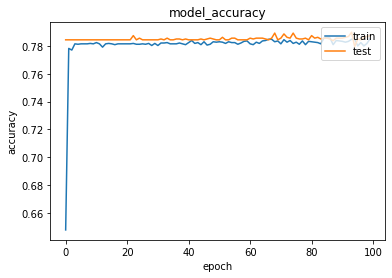

<function matplotlib.pyplot.show(*args, **kw)>

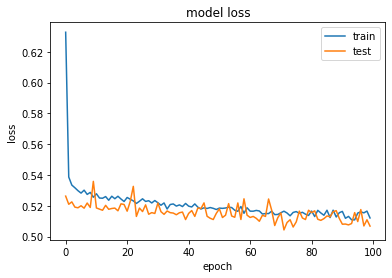

In [347]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend( ['train','test'],loc='upper right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show

Evaluate the Model

In [348]:
score =model.evaluate(x,y)
#print( 'Accuracy :%.2f' % (accuracy*100))
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

157/157 [==============================] - 0s 1ms/step - loss: 0.5111 - accuracy: 0.7848
accuracy: 78.48%
